In [26]:
#Training the image classifier
import torch
import torchvision
import torchvision.transforms as transforms
from Bio.Seq import Seq
import os
import glob
import pathlib
import pickle
import numpy as np
import random

In [27]:
strep_train = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\training data\\strep_train.txt', 'rb'))
lacto_train = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\training data\\lacto_train.txt', 'rb'))
bac_train = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\training data\\bac_train.txt', 'rb'))
pseudo_train = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\training data\\pseudo_train.txt', 'rb'))

# strep_train = strep_train[:len(strep_train)//2]
strep_train = random.sample(strep_train, len(lacto_train))
# lacto_train = lacto_train[:len(lacto_train)//2]
# bac_train = bac_train[:len(bac_train)//2]
bac_train = random.sample(bac_train, len(lacto_train))
# pseudo_train = pseudo_train[:len(pseudo_train)//2]
pseudo_train = random.sample(pseudo_train, len(lacto_train))


strep_train_array = np.asarray(strep_train)
strep_train_array = np.reshape(strep_train_array, [len(strep_train_array), 1, 64, 64])
# print(strep_train_array.shape)

lacto_train_array = np.asarray(lacto_train)
lacto_train_array = np.reshape(lacto_train_array, [len(lacto_train_array), 1, 64, 64])
# print(lacto_train_array.shape)

bac_train_array = np.asarray(bac_train)
bac_train_array = np.reshape(bac_train_array, [len(bac_train_array), 1, 64, 64])
# print(bac_train_array.shape)

pseudo_train_array = np.asarray(pseudo_train)
pseudo_train_array = np.reshape(pseudo_train_array, [len(pseudo_train_array), 1, 64, 64])
# print(pseudo_train_array.shape)

train_full_list = np.concatenate((strep_train_array, lacto_train_array, bac_train_array, pseudo_train_array))

# print(train_full_list.shape)

# print(strep_train_array[5])

# print(train_full_list[5])

label_bac = np.ones(len(bac_train_array)) * 1
label_lacto = np.ones(len(lacto_train_array)) * 2
label_pseudo = np.ones(len(pseudo_train_array)) * 3
label_strep = np.ones(len(strep_train_array)) * 4

train_label_list = np.concatenate((label_strep, label_lacto, label_bac, label_pseudo))

# print(len(train_label_list))

In [3]:
strep_test = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\testing data\\strep_test.txt', 'rb'))
lacto_test = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\testing data\\lacto_test.txt', 'rb'))
bac_test = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\testing data\\bac_test.txt', 'rb'))
pseudo_test = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\testing data\\pseudo_test.txt', 'rb'))

# strep_test = strep_test[:len(strep_test)//2]
strep_test = random.sample(strep_test, len(lacto_test))
# lacto_test = lacto_test[:len(lacto_test)//2]
# bac_test = bac_test[:len(bac_test)//2]
bac_test = random.sample(bac_test, len(lacto_test))
# pseudo_test = pseudo_test[:len(pseudo_test)//2]
pseudo_test = random.sample(pseudo_test, len(lacto_test))

strep_test_array = np.asarray(strep_test)
strep_test_array = np.reshape(strep_test_array, [len(strep_test_array), 1, 64, 64])
print(strep_test_array.shape)

lacto_test_array = np.asarray(lacto_test)
lacto_test_array = np.reshape(lacto_test_array, [len(lacto_test_array), 1, 64, 64])
print(lacto_test_array.shape)

bac_test_array = np.asarray(bac_test)
bac_test_array = np.reshape(bac_test_array, [len(bac_test_array), 1, 64, 64])
print(bac_test_array.shape)

pseudo_test_array = np.asarray(pseudo_test)
pseudo_test_array = np.reshape(pseudo_test_array, [len(pseudo_test_array), 1, 64, 64])
print(pseudo_test_array.shape)

test_full_list = np.concatenate((strep_test_array, lacto_test_array, bac_test_array, pseudo_test_array))

print(test_full_list.shape)

# print(strep_test_array[5])

# print(test_full_list[5])

label_bac = np.ones(len(bac_test_array)) * 1
label_lacto = np.ones(len(lacto_test_array)) * 2
label_pseudo = np.ones(len(pseudo_test_array)) * 3
label_strep = np.ones(len(strep_test_array)) * 4

test_label_list = np.concatenate((label_strep, label_lacto, label_bac, label_pseudo))

(1873, 1, 64, 64)
(1873, 1, 64, 64)
(1873, 1, 64, 64)
(1873, 1, 64, 64)
(7492, 1, 64, 64)


In [22]:
train_full_list = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\train_final_data\\train_full_list.txt', 'rb'))
train_label_list = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\train_final_data\\train_label_list.txt', 'rb'))
test_full_list = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\test_final_data\\test_full_list.txt', 'rb'))
test_label_list = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\test_final_data\\test_label_list.txt', 'rb'))

In [4]:
# training dataset assembly
from torch.utils.data import TensorDataset, DataLoader

# use x_train and y_train as numpy array without further modification
x_train = np.array(train_full_list)
y_train = np.array(train_label_list)

# convert to numpys to tensor
tensor_x = torch.Tensor(x_train)
tensor_y = torch.Tensor(y_train)
# create the dataset
trainset = TensorDataset(tensor_x,tensor_y) 
# create your dataloader
trainloader = DataLoader(trainset,batch_size=64, shuffle=True) 

#check if you can get the desired things
i1, l1 = next(iter(trainloader))
print(i1.shape)   # torch.Size([1, 1, 28, 28]) 
print(l1.shape)   # torch.Size([1]) 


torch.Size([64, 1, 64, 64])
torch.Size([64])


In [5]:
# fix to custom dataset work?
from torch.utils.data import TensorDataset, DataLoader

# use x_train and y_train as numpy array without further modification
x_test = np.array(test_full_list)
y_test = np.array(test_label_list)

# convert to numpys to tensor
tensor_x1 = torch.Tensor(x_test)
tensor_y1 = torch.Tensor(y_test)
# create the dataset
testset = TensorDataset(tensor_x1,tensor_y1) 
# create your dataloader
testloader = DataLoader(testset,batch_size=64, shuffle=True) 

#check if you can get the desired things
i2, l2 = next(iter(testloader))
print(i2.shape)   # torch.Size([1, 1, 28, 28]) 
print(l2.shape)   # torch.Size([1]) 

torch.Size([64, 1, 64, 64])
torch.Size([64])


In [6]:
def npy_loader(path):
    sample = torch.from_numpy(np.load(path))
    return sample

In [7]:
import matplotlib.pyplot as plt
import numpy as np

batch_size = 64

classes = torch.Tensor([1, 2, 3, 4]).type(torch.LongTensor)

In [8]:
# shows image, likely unneeded
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


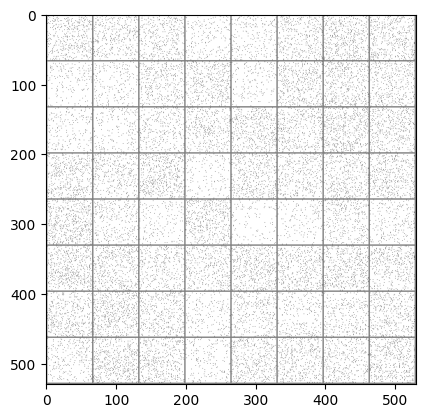

    1     4     4     3     3     4     2     1     3     3     1     2     3     4     2     1     3     3     4     2     1     1     1     2     2     2     1     3     4     4     1     2     1     4     3     2     3     3     4     3     2     1     4     4     2     2     1     4     1     2     4     3     1     2     4     1     2     2     1     3     4     4     4     2


In [9]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
images = images.type(torch.LongTensor)
labels = labels.type(torch.LongTensor)
# show imagesx
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]-1]:5d}' for j in range(batch_size)))

In [10]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 1 output channel, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 4, 16)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(4, 1, 8)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(64, 64)  # 5*5 from image dimension
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)

    def forward(self, input):
        # Convolution layer C1: 1 input image channel, 6 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a Tensor with size (N, 6, 28, 28), where N is the size of the batch
        c1 = F.relu(self.conv1(input))
        # Subsampling layer S2: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 16, 14, 14) Tensor
        s2 = F.max_pool2d(c1, (2, 2))
        # Convolution layer C3: 6 input channels, 16 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a (N, 16, 10, 10) Tensor
        c3 = F.relu(self.conv2(s2))
        # Subsampling layer S4: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 16, 5, 5) Tensor
        s4 = F.max_pool2d(c3, 2)
        # Flatten operation: purely functional, outputs a (N, 400) Tensor
        s4 = torch.flatten(s4, 1)
        # Fully connected layer F5: (N, 400) Tensor input,
        # and outputs a (N, 120) Tensor, it uses RELU activation function
        f5 = F.relu(self.fc1(s4))
        # Fully connected layer F6: (N, 120) Tensor input,
        # and outputs a (N, 84) Tensor, it uses RELU activation function
        f6 = F.relu(self.fc2(f5))
        # Gaussian layer OUTPUT: (N, 84) Tensor input, and
        # outputs a (N, 10) Tensor
        output = self.fc3(f6)
        return output


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 4, kernel_size=(16, 16), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(4, 1, kernel_size=(8, 8), stride=(1, 1))
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
)


In [11]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [12]:
net.to(device)
# inputs, labels = data[0].to(device), data[1].to(device)

Net(
  (conv1): Conv2d(1, 4, kernel_size=(16, 16), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(4, 1, kernel_size=(8, 8), stride=(1, 1))
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
)

In [13]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [14]:
for epoch in range(4):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        labels = labels.type(torch.LongTensor)
        inputs, labels = inputs.cuda(), labels.cuda()
        
        # inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        outputs = outputs.cuda()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Finished Training


In [15]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


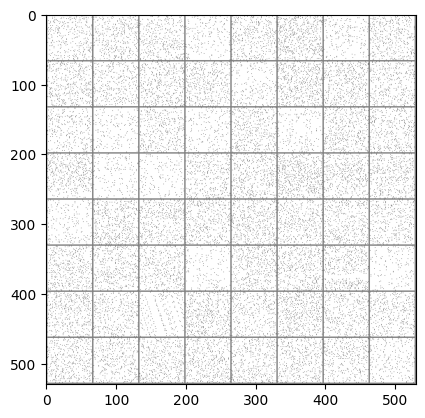

    2     4     1     3     2     4     3     1     2     4     4     4     3     2     1     4     2     3     2     3     2     3     1     4     1     3     3     2     4     2     4     2     3     4     2     1     1     2     2     1     1     2     4     3     4     2     2     3     2     4     4     2     2     2     2     4     1     4     4     2     2     1     4     3


In [16]:
dataiter = iter(testloader)
images, labels = next(dataiter)
images = images.type(torch.LongTensor)
labels = labels.type(torch.LongTensor)
# print images
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]-1]:5d}' for j in range(batch_size)))

In [17]:
PATH = './cifar_net.pth'
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [18]:
images = images.type(torch.FloatTensor)
labels = labels.type(torch.FloatTensor)
outputs = net(images)

In [19]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]-1]:5d}'
                              for j in range(64)))

Predicted:      4     4     2     3     1     2     4     2     4     4     4     4     3     1     2     1     2     3     2     3     1     3     2     2     4     3     3     4     1     1     2     2     3     2     2     2     4     4     4     3     2     2     2     3     2     2     3     3     4     1     2     1     4     3     2     2     2     4     1     4     2     4     4     3


In [20]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 64 test images: {100 * correct // total} %')

Accuracy of the network on the 64 test images: 44 %


In [21]:
# prepare to count predictions for each class
correct_pred = [0, 0, 0, 0]
total_pred = [0, 0, 0, 0]

# again no gradients needed
with torch.no_grad(): 
    for data in testloader:
        images, labels = data
        labels = labels.type(torch.LongTensor)
        images = images.type(torch.FloatTensor)
        # labels = labels.type(torch.FloatTensor)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[label.item()-1] += 1
            # print("correct pred:", correct_pred)
            total_pred[label.item()-1] += 1

print(len(correct_pred))
# print accuracy for each class
for i,j in enumerate(correct_pred):
    accuracy = 100 * correct_pred[i] / total_pred[i]
    print(f'Accuracy for class: {i+1:5d} is {accuracy:.1f} %')

4
Accuracy for class:     1 is 19.2 %
Accuracy for class:     2 is 43.5 %
Accuracy for class:     3 is 84.5 %
Accuracy for class:     4 is 31.1 %


In [22]:
net.to(device)
inputs, labels = data[0].to(device), data[1].to(device)

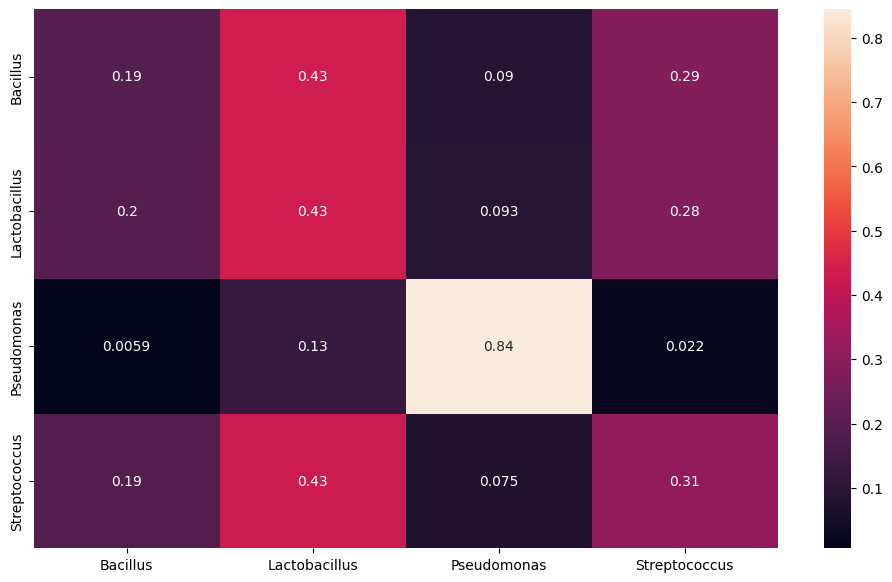

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

# iterate over test data
for inputs, labels in testloader:
        inputs, labels = inputs.cuda(), labels.cuda()
        output = net(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
classes = ('Bacillus', 'Lactobacillus', 'Pseudomonas', 'Streptococcus')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')